# Calgary Crime Data Analysis and Neural Network Prediction

The aim of this project is to use the Crime and Disorder Data provided by the City of Calgary's data website to analyze the data and predict the number of crimes that will occur in the future. The data is from 2018 to 2024 and contains the number of crimes that occurred in Calgary for each month. After throughly analyzing the data, I will be building a neural network model and optimizing it to predict the number of crimes that will occur in the future.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Community_Crime_Statistics_20240522.csv')

In [3]:
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [4]:
#checking the numbers of rows and columns
df.shape

(70661, 5)

# Data Preprocessing

In [5]:
df.isnull().sum()


Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

In [6]:
#checking the dtypes of an database
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

In [7]:
#descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


# Exploratory Data Analysis

Text(0, 0.5, '')

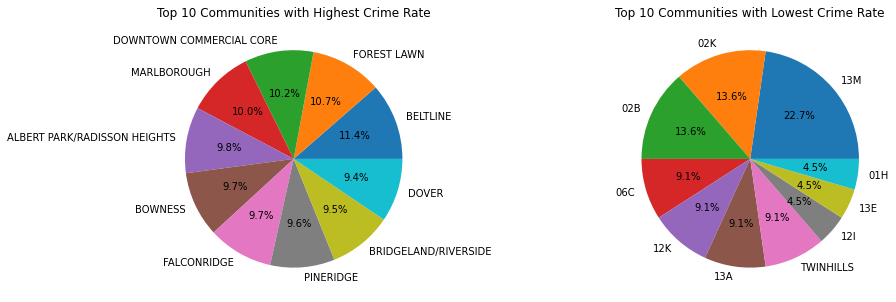

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')

These pie charts show the distribution of crimes in each community. The first pie chart shows the top 10 most dangerous communities in Calgary. The second pie chart shows the distribution of top 10 safest communities in Calgary. In the first pie chart, Beltline is the most dangerous community in Calgary with 11.4% of the top crimes in number, followed by Forest Lawn with 10.7% and Downtown Commercial Core with 10.2%. In the second pie chart, the safest community is 13M with 22.7% of the least crimes in number, followed by 02K with 13.6% and 02B with 13.6%.

# Crime Category Distribution

Text(0, 0.5, '')

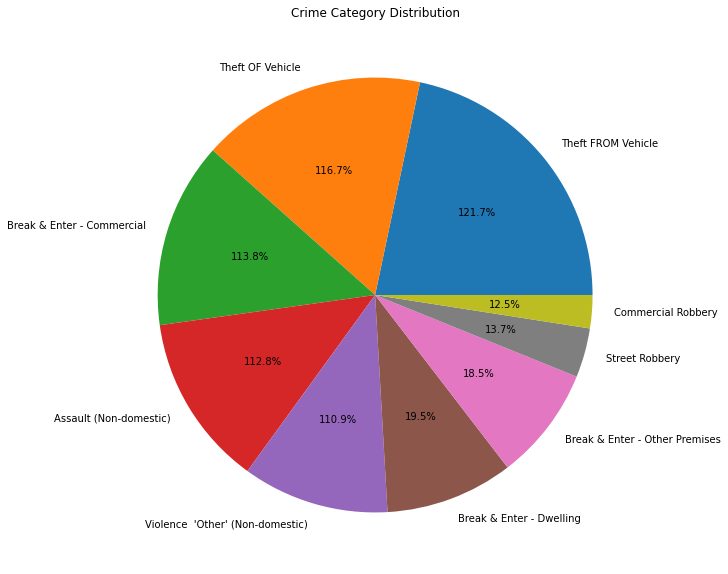

In [12]:
plt.figure(figsize=(10, 10))
df['Category'].value_counts().plot.pie(autopct = '1%.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

This graph shows the distribution of crimes in each category by the number of crimes. The top crime category is Theft from Vehicle with 21.7% of the total crimes, followed by Theft of Vehicle with 16.7% and Break and Enter - Commercial with 13.8%. The least crime category inc;udes commerical or street robbery.

# Crime Reportings Over the Years

Text(0.5, 1.0, 'Crime Reportings by Year')

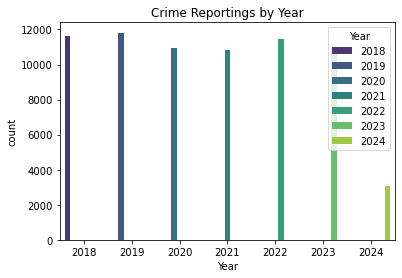

In [14]:
sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

This bar graph shows the distribution of number of crimes reported in the year. The year 2019 had the highest reportings of crimes followed by 2022 and 2018. The crime reportings in 2024 are less due to limited data till April 2024.

# Crime Reportings by Month

Text(0.5, 1.0, 'Crime Reporting by Month')

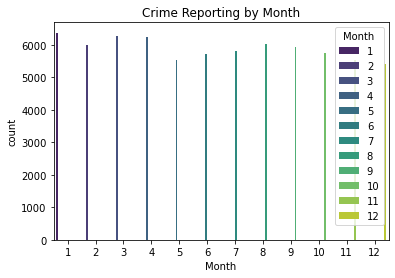

In [15]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette = 'viridis').set_title('Crime Reporting by Month')

# Community and Category Analysis


Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

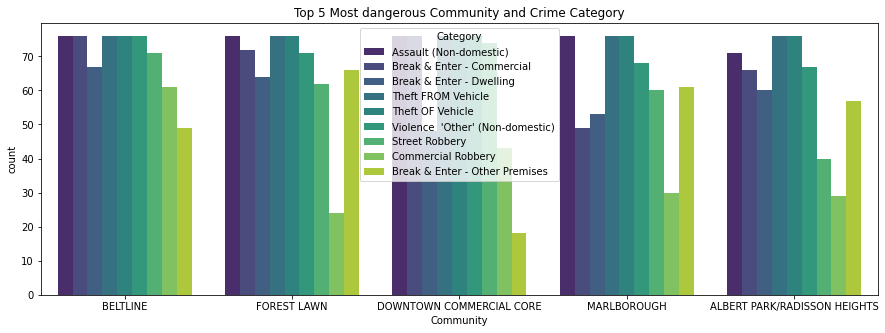

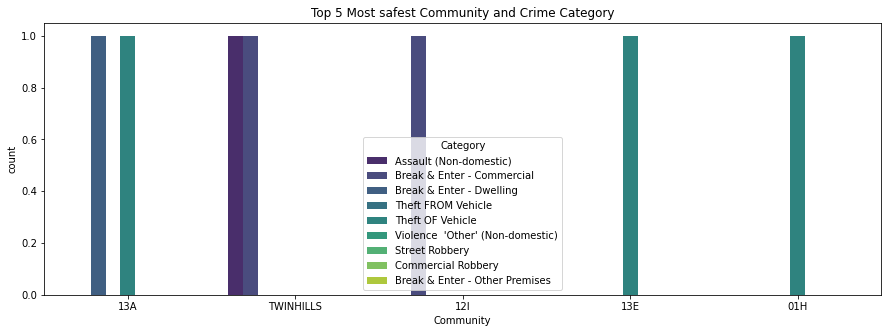

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

These two graphs shows the analysis of communities with the crime category. This help us to visualize the pattern of crime in each community. We can see that certain cateogries are more common in certain communities than others. In the top 5 dangerous communities, Forest Lawn has the highest of Break & Enter - other premises, Malbrough has the lowest Commerical Robbery. These are the few examples of the analysis.

# Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

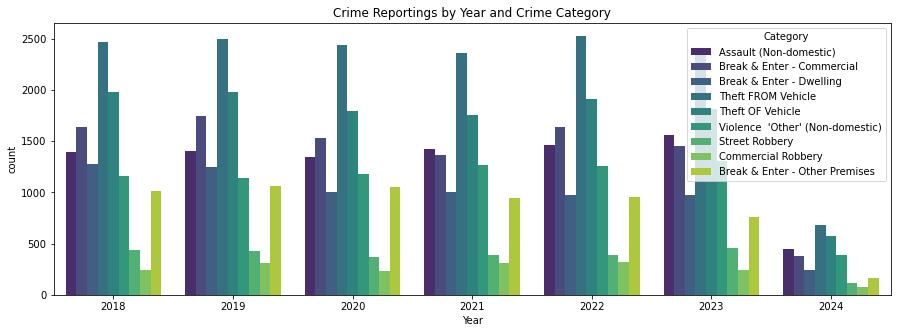

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

# Data Preprocessing 2

In [20]:
from sklearn.preprocessing import LabelEncoder

#label encoding object
le = LabelEncoder()

#object per column
object_type_columns = df.select_dtypes(include = "object").columns


#label encoding
for col in object_type_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


# Building a Neural Network Model

In [24]:
#prepare sequences of LSTM
def create_sequences(data, seq_length):
    xs = [] #making empty list
    ys = [] #making empty list
    
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(y)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [45]:
seq_length = 10

In [46]:
X, y = create_sequences(df, seq_length)

# Train Test split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [48]:
print(X_train.shape)

(49455,)


# Building and Traning the LSTM Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [50]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

IndexError: tuple index out of range